In [8]:
from __future__ import print_function, division

%matplotlib inline
%precision 3
import random
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import random
import networkx as nx
import numpy as np

import thinkplot

In [87]:
def barabasi_albert_graph(n, k, seed=None):
    """Constructs a BA graph.
    
    n: number of nodes
    k: number of edges for each new node
    seed: random seen
    """
    # grab a random seed if none is provided
    if seed is not None:
        random.seed(seed)
    
    #create empty graph
    G = nx.empty_graph(k)
    targets = list(range(k))
    repeated_nodes = []

    for source in range(k, n):

        G.add_edges_from(zip([source]*k, targets))

        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * k)

        targets = _random_subset(repeated_nodes, k)
    
    social = {}
    resistance = {}
    infected = {}
    
    for edge in G.edges():
        social[edge] = random.randint(0,20)
        
    for node in G.nodes():
        resistance[node] = random.randint(0,100)
        infected[node] = 0
#         print(node)
    
    infected[0] = 100
    print(infected)
    nx.set_node_attributes(G, "Resistance", resistance)
    nx.set_node_attributes(G, "Infected", infected)
    
    nx.set_edge_attributes(G, "Social_Bond", social)
    return G

In [88]:
def _random_subset(repeated_nodes, k):
    """Select a random subset of nodes without repeating.
    
    repeated_nodes: list of nodes
    k: size of set
    
    returns: set of nodes
    """
    targets = set()
    while len(targets) < k:
        x = random.choice(repeated_nodes)
        targets.add(x)
    return targets

In [89]:
def step(G):
    for node in G.nodes():
        for neighbor in G.neighbors(node):
            if neighbor['Infected'] > 50: #Infection greater than threshold?
                node['Infected'] += 1*G[node][neighbor]['Social_Bond']
    return G
    #iterate over nodes, iterate over their edges, check all endpoint nodes
    #for infection on the other end, if found, 1*Social_Bond
    #is added as sickness to the original node. If current node's sickness is greater than any other nodes, no
    #sickness is added.

IndentationError: expected an indented block (<ipython-input-89-f59b51986908>, line 5)

{0: 100, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}


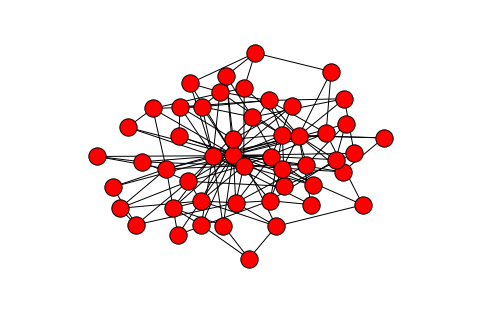

In [90]:
graph = nx.draw(barabasi_albert_graph(50, 3))

In [91]:
G = barabasi_albert_graph(50, 2)
print(nx.get_node_attributes(G,"Infected"))

{0: 100, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}
{0: 100, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0}


In [70]:
print(G[3])

{1: {'Social_Bond': 3}, 2: {'Social_Bond': 9}, 4: {'Social_Bond': 8}, 9: {'Social_Bond': 18}, 10: {'Social_Bond': 8}, 21: {'Social_Bond': 10}, 24: {'Social_Bond': 20}, 25: {'Social_Bond': 8}, 42: {'Social_Bond': 6}}
